# Exercise 1

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/titanic_csv.csv").iloc[:,1:]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


##### Preprocessing

In [3]:
# Remove some unused columns
df.drop(columns=["name","home.dest","cabin","ticket"], axis=1, inplace=True)

df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [4]:
# Check missing values
missing=df.isnull().sum()

missing[missing>0]

age         263
fare          1
embarked      2
dtype: int64

In [5]:
# Fill missing values
age_missing=df.age.dropna().median()

fare_missing=df.fare.dropna().median()

embark_missing="S"

df["age"]=df.age.fillna(age_missing)
df["fare"]=df["fare"].fillna(fare_missing)
df["embarked"]=df["embarked"].fillna(embark_missing)

#### Feature and target splitting

In [6]:
X=df[["pclass","sex","age","sibsp","parch","fare","embarked"]]
y=df["survived"]

In [7]:
# get dummies
from sklearn.model_selection import train_test_split
X=pd.get_dummies(X)

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

## Builidng randomforest model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Make prediction on X_test
y_pred=model.predict(X_test)

In [11]:
# Check accuracy
test_score=model.score(X_test, y_test)

train_score=model.score(X_train,y_train)

print(f"Test accuracy: {test_score} and train accuracy: {train_score}")

Test accuracy: 0.7926829268292683 and train accuracy: 0.9694189602446484


##### Feature importance

In [12]:
df_feat=pd.DataFrame({"Feature":X.columns, "Score":model.feature_importances_})

df_feat=df_feat.sort_values(by="Score", ascending=True)

df_feat

,Feature,Score
8,embarked_Q,0.006345
9,embarked_S,0.012246
7,embarked_C,0.017706
3,parch,0.037484
2,sibsp,0.048190
0,pclass,0.088367
6,sex_male,0.134361
5,sex_female,0.136077
1,age,0.257336
4,fare,0.261887


### Visualizing the feature importance

In [13]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

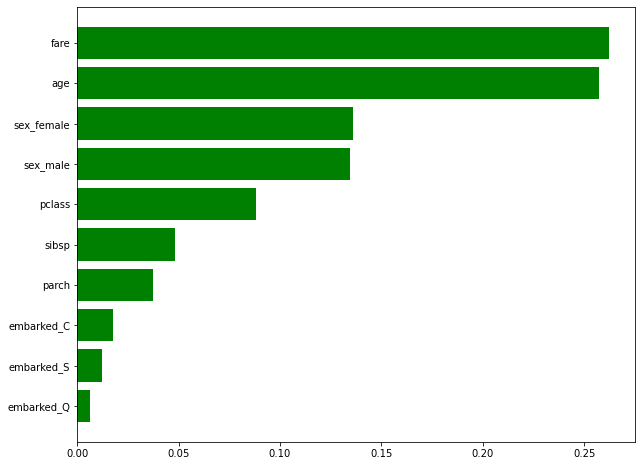

In [14]:
plt.figure(figsize=(10,8))
plt.barh(df_feat["Feature"],df_feat["Score"], color="g")

### Visualizing the result 

In [15]:
y_prob=model.predict_proba(X_test)

In [16]:
# Get True positive probability
y_score=y_prob[:,1]

from sklearn.metrics import roc_curve, auc

fpr,tpr, threshold=roc_curve(y_test, y_score)

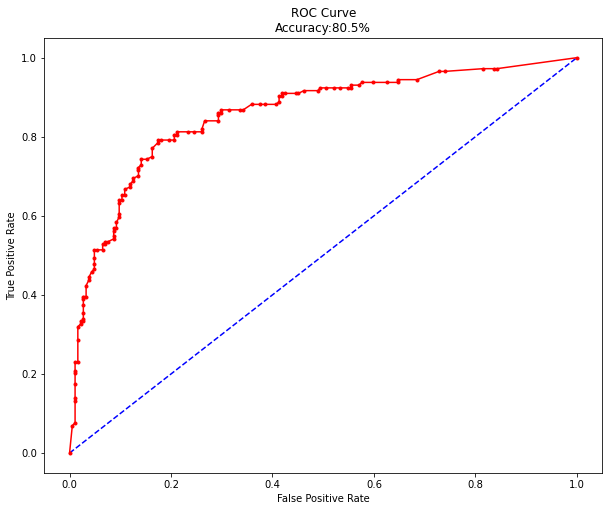

In [17]:
plt.figure(figsize=(10,8))

plt.plot([0,1],[0,1], color="b",linestyle="--")

plt.plot(fpr, tpr, color="r",marker="." )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve\nAccuracy:80.5%")
plt.show()

# Exercise 2: Absenteeism at Work 

In [55]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/Absenteeism_at_work.csv",sep=";").iloc[:, 1:]
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


##### Pre-processing data

In [56]:
dict_name={x: x.replace(" ","_") for x in df.columns }

df=df.rename(columns=dict_name)

df.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [57]:
# Check missing data
df.isnull().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_per_day          0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [58]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason_for_absence               740 non-null    int64  
 1   Month_of_absence                 740 non-null    int64  
 2   Day_of_the_week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation_expense           740 non-null    int64  
 5   Distance_from_Residence_to_Work  740 non-null    int64  
 6   Service_time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work_load_Average_per_day        740 non-null    float64
 9   Hit_target                       740 non-null    int64  
 10  Disciplinary_failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

##### Splitting data for training and testing

In [59]:
X=df.iloc[:, 0:len(df.columns)-1]
y=df["Absenteeism_time_in_hours"]

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#### Builiding a random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
model=RandomForestRegressor(n_estimators=200)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [63]:
# Make prediction on X_test

y_pred=model.predict(X_test)

In [64]:
# Check accuracy 
R2test=model.score(X_test, y_test)

R2train=model.score(X_train, y_train)

print("R2 test is {:.3} and R2 train is {:.3}".format(R2test, R2train))

R2 test is -0.63 and R2 train is 0.866


#### Obtain variable importance

In [65]:
df_feat=pd.DataFrame({"Feature":X.columns, "Score":model.feature_importances_})

df_feat=df_feat.sort_values(by="Score", ascending=True)

df_feat

,Feature,Score
10,Disciplinary_failure,0.000451
11,Education,0.002999
14,Social_smoker,0.004558
6,Service_time,0.009029
13,Social_drinker,0.011098
18,Body_mass_index,0.014130
12,Son,0.019237
5,Distance_from_Residence_to_Work,0.022080
15,Pet,0.022130
3,Seasons,0.028119


<BarContainer object of 19 artists>

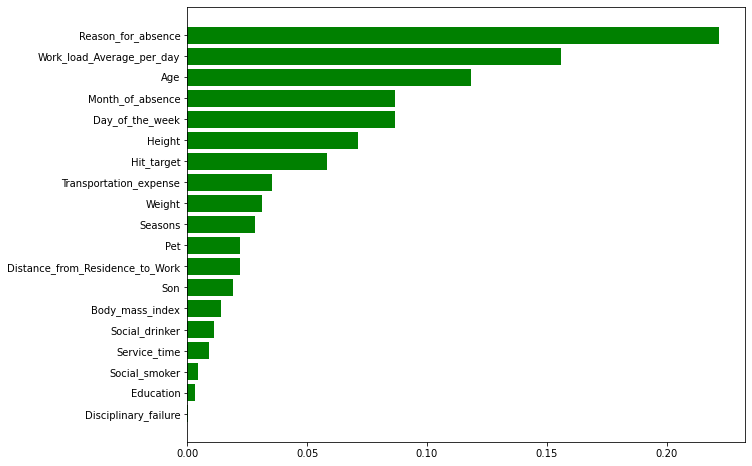

In [66]:
plt.figure(figsize=(10,8))
plt.barh(df_feat["Feature"],df_feat["Score"], color="g")

#### Rebuild the random forest model

In [67]:
# Get variable with >0.05
df_feat.reset_index(drop=True, inplace=True)
chosen_variable=[df_feat.Feature[index] for index, value in enumerate(df_feat["Score"]) if value>0.05]

chosen_variable

['Hit_target',
 'Height',
 'Day_of_the_week',
 'Month_of_absence',
 'Age',
 'Work_load_Average_per_day',
 'Reason_for_absence']

In [68]:
# Chose variables with value>0.05
X=X[chosen_variable]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

model=RandomForestRegressor(n_estimators=200)

model.fit(X_train, y_train)

# Make prediction on X_test

y_pred=model.predict(X_test)

# Check accuracy 
R2test=model.score(X_test, y_test)

R2train=model.score(X_train, y_train)

print("R2 test is {:.3} and R2 train is {:.3}".format(R2test, R2train))

R2 test is -0.641 and R2 train is 0.859


- Như vậy sau cả hai lần chạy mô hình random forest. R2 đều bị âm.